# Example of a simulation run (calibration + evaluation)

## Configure a Gardenia tree

In [1]:
import mygardenia.configure

In [2]:
working_dir = '../../examples/my-example'

### Either via the use of TOML files (option 1)

In [3]:
help(mygardenia.configure.GardeniaTree.__init__)

Help on function __init__ in module mygardenia.configure:

__init__(self, catchment: str = None, settings: str = None)
    Initialise a configuration tree gathering all the settings
     and parameters for the Gardenia model.
    
    :Parameters:
    
        catchment: `str`, optional
            The path to the TOML file containing the information about
            the simulation data for the catchment to simulate.
    
        settings: `str`, optional
            The path to the TOML file containing the settings and
            the parameters configuring the simulation with the
            Gardenia model.
    
    :Returns:
    
        `GardeniaTree`
    
    **Examples**
    
    Generating a configuration tree with default values:
    
    >>> t = GardeniaTree()
    
    Generating a configuration tree with default values except for
    those settings and parameters whose values are contained in the
    given TOML files:
    
    >>> t = GardeniaTree(
    ...     catchment='exa

In [4]:
tree = mygardenia.configure.GardeniaTree(
    catchment=f'{working_dir}/config/bassin.toml',
    settings=f'{working_dir}/config/reglages.toml',
)

### Or via the use of RGA and GAR files (option 2)

In [5]:
help(mygardenia.configure.GardeniaTree.from_rga_gar)

Help on method from_rga_gar in module mygardenia.configure:

from_rga_gar(rga: str, gar: str) method of abc.ABCMeta instance
    Initialise a configuration tree from the RGA and GAR files
    of Gardenia v8.8.
    
    :Parameters:
    
        rga: `str`, optional
            The path to the RGA file containing the information about
            the simulation data for the catchment to simulate.
    
        gar: `str`, optional
            The path to the GAR file containing the settings and
            the parameters configuring the simulation with the
            Gardenia model.
    
    :Returns:
    
        `GardeniaTree`
    
    **Examples**
    
    >>> t = GardeniaTree.from_rga_gar(
    ...     rga='examples/my-example/config/exemple.rga',
    ...     gar='examples/my-example/config/exemple.gar'
    ... )


In [6]:
tree = mygardenia.configure.GardeniaTree.from_rga_gar(
    rga=f'{working_dir}/config/exemple.rga',
    gar=f'{working_dir}/config/exemple.gar',
)

### Or via the use of a nested dictionary (option 3)

In [7]:
tree = mygardenia.configure.GardeniaTree()

In [8]:
help(tree.update)

Help on method update in module mygardenia.configure:

update(updates: dict) method of mygardenia.configure.GardeniaTree instance
    Update the existing values in the configuration tree.
    
    :Parameters:
    
        updates: `dict`
            The configuration updates to overwrite the existing
            values contained in the Gardenia tree.
    
    :Returns:
    
        `None`
    
    **Examples**
    
    Generating a configuration tree with default values, then
    updating some of the default values it contains:
    
    >>> t = GardeniaTree()
    >>> t.update(
    ...     {
    ...         'data': {
    ...             'simulation': {
    ...                 'rainfall': 'pluie.prn',
    ...                 'pet': 'etp.prn'
    ...             },
    ...             'observation': {
    ...                 'streamflow': 'debit.prn',
    ...                 'piezo-level': 'niveau.prn'
    ...             }
    ...         }
    ...     }
    ... )
    
    Generating a 

In [9]:
tree.update(
    {
        'data': {
            'simulation': {
                'rainfall': 'pluie.prn',
                'pet': 'etp.prn'
            },
            'observation': {
                'streamflow': 'debit.prn',
                'piezo-level': 'niveau.prn'
            }
        },
        'description': {
            'project': "example run",
            'basin': "example",
        },
        'general_settings': {
            'streamflow_obs_weight': 5,
            'piezo-level_obs_weight': 2,
            'calc_streamflow': True,
            'calc_piezo-level': True,
            'save_recharge_effective-rainfall': False,
            'save_streamflow_piezo-level': True,
            'save_water-balance': '2',
            'save_impulse_and_cumulative_response': False,
            'computation_scheme': '0',
            'transform_calibration_data': '0',
            'forecast_run': False,
            'forecast_method': '0',
            'underground_exchange_scheme': '0',
            'consider_snow': False,
            'snowfall_in_file': '0',
            'data_per_hydro_year': '1',
            'streamflow_loss': '0'
        },
        'filter_settings': {
            'observed_streamflow_to_consider': {
                'min': 0.0, 'max': 0.0
            },
            'observed_piezo-level_to_consider': {
                'min': 0.0, 'max': 0.0
            },
            'simulated_streamflow_lower_limit_to_apply': 0.0
        },
        'forecast_settings': {
            'readjustment_factor': 0,
            'standard_deviation_of_intermediate_reservoir': 0,
            'standard_deviation_of_groundwater_reservoir_1': 0,
            'standard_deviation_of_groundwater_reservoir_2': 0,
            'standard_deviation_of_observed_piezo-level': 0,
            'half-life_fall_streamflow_forecast': 0,
            'half-life_fall_piezo-level_forecast': 0
        },
        'basin_settings': {
            'time': {
                'simulation': {
                    'n_years_in_data': 18,
                    'first_year': 1985,
                    'first_month': 0,
                    'first_day': 0
                },
                'forecast': {
                    'n_years_in_data': 0,
                    'first_year': 0,
                    'issue_month': 0,
                    'issue_day': 0,
                    'span': 0,
                    'pumping_year': 0
                }
            },
            'model': {
                'initialisation': {
                    'antecedent_conditions': 0,
                    'spinup': {
                        'n_years': 4,
                        'n_cycles': 1
                    }
                },
                'calibration': {
                    'n_tail_years_to_trim': 3,
                    'max_iterations': 250
                },
                'structure': {
                    'n_groundwater_reservoirs': 1,
                    'groundwater_reservoir_for_piezo-level': 1,
                    'intermediate_runoff_by_overspill': '0',
                    'intermediate_reservoir_evapotranspiration_decrease_only_when_half_empty': False,
                    'constant_runoff_ratio_scheme': False,
                    'storage_coefficient_computation_scheme': '0'
                }
            }
        },
        'physical_parameters': {
            'annual_effective-rainfall': {
                'val': 0
            },
            'external_flow': {
                'val': 0, 'opt': False
            },
            'basin_area': {
                'val': 524, 'opt': False
            },
            'rainfall_correction': {
                'val': 0, 'opt': False, 'min': -10, 'max': 10
            },
            'pet_correction': {
                'val': 0, 'opt': False, 'min': -15, 'max': 15
            },
            'basin_area_correction': {
                'val': 1, 'opt': False, 'min': 0.02, 'max': 50
            },
            'thornthewaite_reservoir_capacity': {
                'val': 0, 'opt': False, 'min': 0, 'max': 500
            },
            'progressive_reservoir_capacity': {
                'val': 180, 'opt': True, 'min': 0, 'max': 650
            },
            'intermediate_runoff_seepage': {
                'val': 600, 'opt': True, 'min': 1, 'max': 9999
            },
            'intermediate_half-life_seepage': {
                'val': 5, 'opt': True, 'min': 0.15, 'max': 25
            },
            'groundwater_1_drainage': {
                'val': 20, 'opt': True, 'min': 6, 'max': 70
            },
            'groundwater_1_2_exchange': {
                'val': 0, 'opt': False, 'min': 0.05, 'max': 50
            },
            'groundwater_1_double_outflow_threshold': {
                'val': 0, 'opt': False, 'min': 0, 'max': 9999
            },
            'groundwater_2_drainage': {
                'val': 0, 'opt': False, 'min': 0.05, 'max': 50
            },
            'groundwater_external_exchange': {
                'val': 0, 'opt': False, 'min': -70, 'max': 80
            },
            'time_of_concentration': {
                'val': 0, 'opt': False, 'min': 0, 'max': 10
            },
            'thornthewaite_reservoir_initial_deficit': {
                'val': 0, 'opt': False, 'min': 0, 'max': 999
            },
            'progressive_reservoir_initial_deficit': {
                'val': 0, 'opt': False, 'min': 0, 'max': 999
            },
            'intermediate_runoff_threshold': {
                'val': 0, 'opt': False, 'min': 0, 'max': 9999
            },
            'intermediate_half-life_runoff_by_overspill': {
                'val': 0, 'opt': False, 'min': 0.05, 'max': 9999
            },
            'intermediate_half-life_max_runoff_decrease': {
                'val': 0, 'opt': False, 'min': 0.0001, 'max': 1000
            },
            'groundwater_base_level': {
                'val': 0, 'opt': True
            },
            'groundwater_storage_coefficient': {
                'val': 1, 'opt': True, 'min': 0.5, 'max': 35
            },
            'air-temp_correction': {
                'val': 0, 'opt': False, 'min': -3, 'max': 3
            },
            'snowfall_retention_factor': {
                'val': 0, 'opt': False, 'min': 0.001, 'max': 30
            },
            'snow_evaporation_factor': {
                'val': 0, 'opt': False, 'min': -20, 'max': 20
            },
            'snow_melt_correction_with_rainfall': {
                'val': 0, 'opt': False, 'min': -20, 'max': 20
            },
            'natural_snow_melting_threshold': {
                'val': 0, 'opt': False, 'min': -2, 'max': 2
            },
            'snow_melt_degree_day_factor': {
                'val': 0, 'opt': False, 'min': 0.001, 'max': 7
            },
            'snow_melting_in_contact_with_soil': {
                'val': 0, 'opt': False, 'min': 0.001, 'max': 20
            },
            'pumping_river_influence_factor': {
                'val': 1, 'opt': False
            },
            'pumping_river_half-life_rise': {
                'val': 0.5, 'opt': False, 'min': 0.05, 'max': 10
            },
            'pumping_river_half-life_fall': {
                'val': 2, 'opt': False, 'min': 0.05, 'max': 15
            },
            'pumping_groundwater_influence_factor': {
                'val': 1, 'opt': False
            },
            'pumping_groundwater_half-life_rise': {
                'val': 0.5, 'opt': False, 'min': 0.05, 'max': 10
            },
            'pumping_groundwater_half-life_fall': {
                'val': 2, 'opt': False, 'min': 0.05, 'max': 15
            }
        }
    }
)

## Initialise a Gardenia model

In [10]:
import mygardenia.simulate

In [11]:
help(mygardenia.simulate.GardeniaModel.__init__)

Help on function __init__ in module mygardenia.simulate:

__init__(self, tree: mygardenia.configure.GardeniaTree, working_dir: str)
    Initialise a wrapper for a simulation with the Gardenia model.
    
    :Parameters:
    
        tree: `GardeniaTree`
            The Gardenia tree containing all the settings and parameters
            to be given to the Gardenia model.
    
        working_dir: `str`
            The path to the directory containing the simulation data,
            the potential configuration files and the future simulation
            output.
    
    :Returns:
    
        `GardeniaModel`
    
    **Examples**
    
    >>> t = GardeniaTree()
    >>> m = GardeniaModel(t, working_dir='examples/my-example')


In [12]:
model = mygardenia.simulate.GardeniaModel(tree, working_dir)

## Run a simulation

In [13]:
help(model.run)

Help on method run in module mygardenia.simulate:

run(execution_mode: str = 'M', save_outputs: bool = True, _verbose: bool = False) method of mygardenia.simulate.GardeniaModel instance
    Run the simulation with Gardenia.
    
    :Parameters:
    
        execution_mode: `str`, optional
            The execution mode to use when calling Gardenia. It
            can be 'M' for silent or 'D' for direct. If not provided,
            silent mode is used.
    
        save_outputs: `str`, optional
            Whether to try to save the streamflow and/or piezometric
            level as separate CSV files if they are available in
            Gardenia output files. If not provided, set to True.
    
    :Returns:
    
        `None`
    
    **Examples**
    
    >>> t = GardeniaTree(
    ...     catchment='examples/my-example/config/bassin.toml',
    ...     settings='examples/my-example/config/reglages.toml'
    ... )
    >>> m = GardeniaModel(t, working_dir='examples/my-example')
    >>

In [14]:
model.run(execution_mode='M')

## Visualise model outputs

In [15]:
help(model.visualise)

Help on method visualise in module mygardenia.simulate:

visualise(variable: str, period: str = None, depth: int = None, filename: str = None, fig_size: tuple = None, return_fig: bool = False) method of mygardenia.simulate.GardeniaModel instance
    Visualise the simulations and the observations time series
    for a given variable.
    
    :Parameters:
    
        variable: `str`
            The model variable to evaluate. It can either be
            'streamflow' or 'piezo_level'.
    
        period: `str`, optional
            The period to consider for the visualisation. It can
            either be 'calib' (only the period used for calibration
            is considered, excluding the initialisation period) or
            'eval' (only the tail period left aside and not used for
            the calibration is considered). If not provided, set to
            default value 'calib'. Note that for a forecast run, this
            parameter is ignored.
    
        depth: `int`, optio

### In calibration

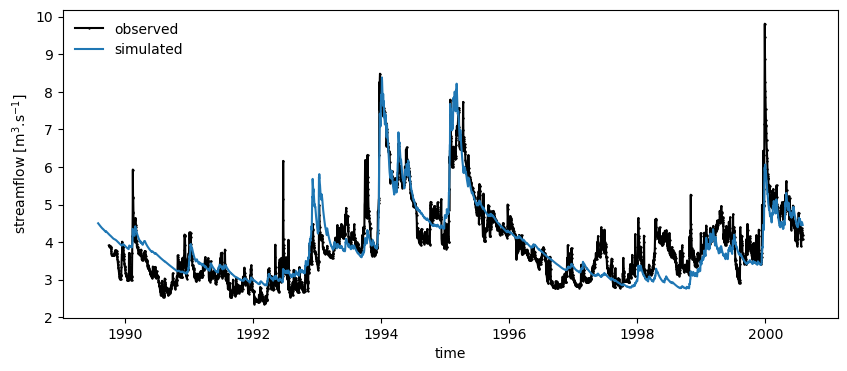

In [16]:
model.visualise(variable='streamflow', period='calib')

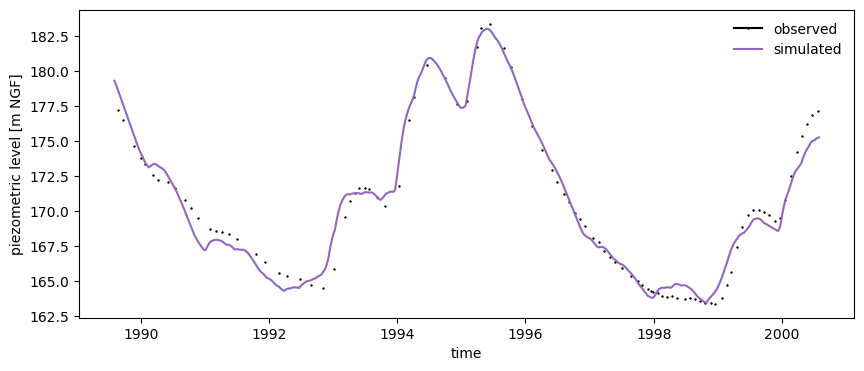

In [17]:
model.visualise(variable='piezo_level', period='calib')

### In evaluation

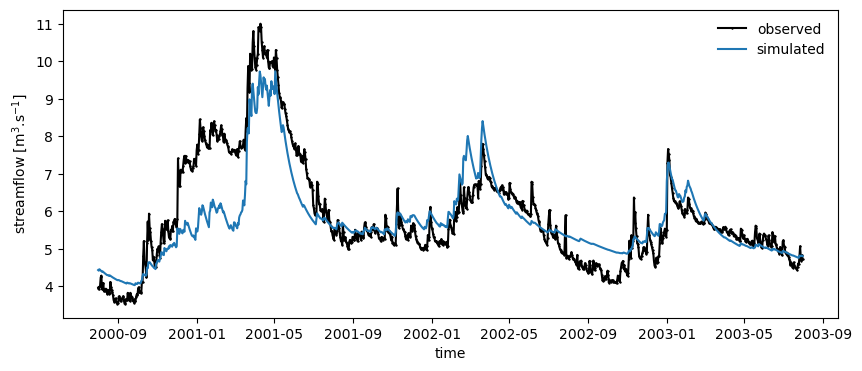

In [18]:
model.visualise(variable='streamflow', period='eval')

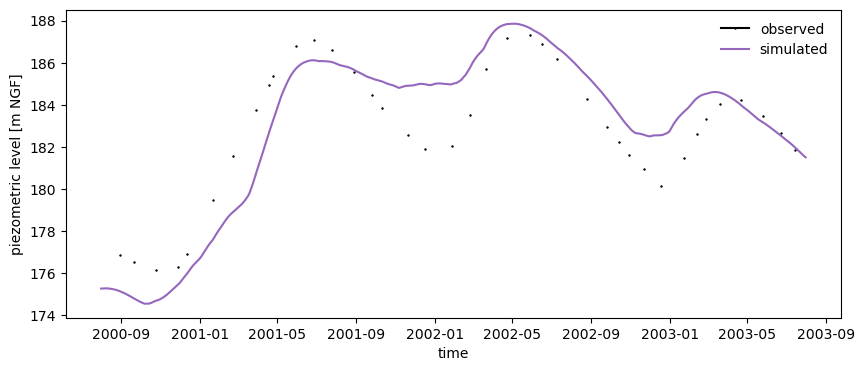

In [19]:
model.visualise(variable='piezo_level', period='eval')

## Evaluation model performance

In [20]:
help(model.evaluate)

Help on method evaluate in module mygardenia.simulate:

evaluate(variable: str, metric: str, period: str = None, transform: str = None, exponent: float = None) method of mygardenia.simulate.GardeniaModel instance
    Evaluate the performance between the simulations and the
    observations for a given variable.
    
    :Parameters:
    
        variable: `str`
            The model variable to evaluate. It can either be
            'streamflow' or 'piezo_level'.
    
        metric: `str`
            The evaluation metric to use to compare observations and
            simulations. It can be any metric available in `evalhyd`
            (https://hydrogr.github.io/evalhyd/metrics/deterministic.html)
    
        period: `str`, optional
            The period to consider for the computation of the evaluation
            metric. It can either be 'calib' (only the period used for
            calibration is considered, excluding the initialisation
            period) or 'eval' (only the tai

### In calibration

In [21]:
model.evaluate(variable='piezo_level', metric='NSE', period='calib')

array(0.97319577)

In [22]:
model.evaluate(variable='streamflow', metric='KGE', period='calib')

array(0.87198351)

### In evaluation

In [23]:
model.evaluate(variable='piezo_level', metric='NSE', period='eval')

array(0.73693917)

In [24]:
model.evaluate(variable='streamflow', metric='KGE', period='eval')

array(0.69992808)

## Process (visualise, evaluate) outputs a posteriori

In [25]:
import mygardenia.postprocess

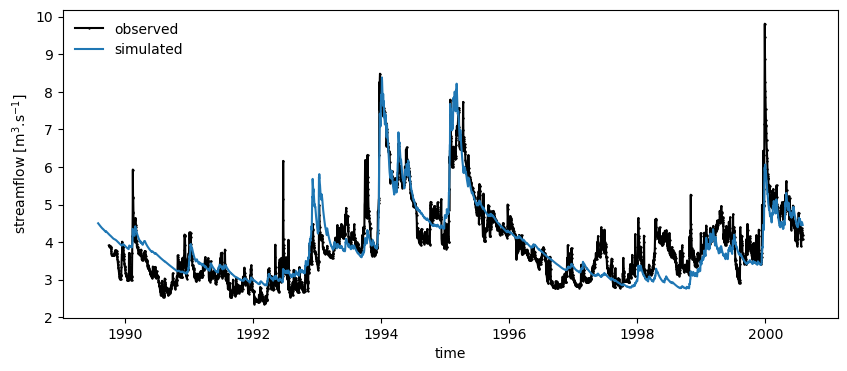

In [26]:
mygardenia.postprocess.visualise(
    working_dir=working_dir, variable='streamflow', period='calib'
)

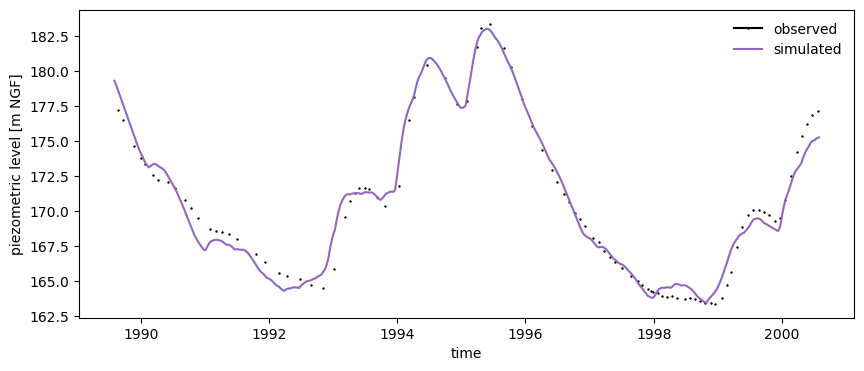

In [27]:
mygardenia.postprocess.visualise(
    working_dir=working_dir, variable='piezo_level', period='calib'
)

In [28]:
mygardenia.postprocess.evaluate(
    working_dir=working_dir, variable='streamflow', metric='KGE', period='calib'
)

array(0.87198351)

In [29]:
mygardenia.postprocess.evaluate(
    working_dir=working_dir, variable='piezo_level', metric='NSE', period='calib'
)

array(0.97319577)